# Intro to simple text classification in keras - with a new dataset

In [3]:
# Do our imports
import numpy as np
import tensorflow as tf
from keras.models import Sequential #base keras model
from keras.layers import Dense, Activation #dense = fully connected layer
from tensorflow.keras.optimizers import SGD

In [4]:
#if any of these give you problems, make sure you've installed all libraries used (pandas, sklearn, and matplot lib)
# using conda install or pip install
# see the moodle page "Instructions for setting up and using Python and Jupyter" for more info on how to do this
import pandas as pd
from sklearn.feature_extraction import _stop_words
from sklearn.metrics.pairwise import cosine_similarity as cosine
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Loading a  new dataset

I'm going to use a relatively large dataset of 560000 yelp reviews, [found on Kaggle](https://www.kaggle.com/datasets/ilhamfp31/yelp-review-dataset?resource=download) 

The original data set was already divided into a train and a test set, here we are loading the train set into the notebook as df, and the test set as df_test

In [26]:
# This assumes the .csv file lives in a directory called "data" which lives in the same directory as this notebook.
# ***if you want to edit this notebook to use a different dataset, edit this to specify a different file:
df = pd.read_csv("data/YelpTrain.csv")
dftest = pd.read_csv("data/YelpTest.csv")

Printing df to see our data in a table format.

**Note that in this database, unlike the class example which used 0&1, a sentiment of "1" means "negative" and "2" means "positive"**

In [15]:
df

,Sentiment,reviews
0,1,"Unfortunately, the frustration of being Dr. Goldberg's patient is a repeat of the experience I've had with so many other doctors in NYC -- good doctor, terrible staff. It seems that his staff simply never answers the phone. It usually takes 2 hours of repeated calling to get an answer. Who has time for that or wants to deal with it? I have run into this problem with many other doctors and I just don't get it. You have office workers, you have patients with medical needs, why isn't anyone answering the phone? It's incomprehensible and not work the aggravation. It's with regret that I feel that I have to give Dr. Goldberg 2 stars."
1,2,"Been going to Dr. Goldberg for over 10 years. I think I was one of his 1st patients when he started at MHMG. He's been great over the years and is really all about the big picture. It is because of him, not my now former gyn Dr. Markoff, that I found out I have fibroids. He explores all options with you and is very patient and understanding. He doesn't judge and asks all the right questions. Very thorough and wants to be kept in the loop on every aspect of your medical health and your life."
2,1,"I don't know what Dr. Goldberg was like before moving to Arizona, but let me tell you, STAY AWAY from this doctor and this office. I was going to Dr. Johnson before he left and Goldberg took over when Johnson left. He is not a caring doctor. He is only interested in the co-pay and having you come in for medication refills every month. He will not give refills and could less about patients's financial situations. Trying to get your 90 days mail away pharmacy prescriptions through this guy is a joke. And to make matters even worse, his office staff is incompetent. 90% of the time when you call the office, they'll put you through to a voice mail, that NO ONE ever answers or returns your call. Both my adult children and husband have decided to leave this practice after experiencing such frustration. The entire office has an attitude like they are doing you a favor. Give me a break! Stay away from this doc and the practice. You deserve better and they will not be there when you really need them. I have never felt compelled to write a bad review about anyone until I met this pathetic excuse for a doctor who is all about the money."
3,1,"I'm writing this review to give you a heads up before you see this Doctor. The office staff and administration are very unprofessional. I left a message with multiple people regarding my bill, and no one ever called me back. I had to hound them to get an answer about my bill. \n\nSecond, and most important, make sure your insurance is going to cover Dr. Goldberg's visits and blood work. He recommended to me that I get a physical, and he knew I was a student because I told him. I got the physical done. Later, I found out my health insurance doesn't pay for preventative visits. I received an $800.00 bill for the blood work. I can't pay for my bill because I'm a student and don't have any cash flow at this current time. I can't believe the Doctor wouldn't give me a heads up to make sure my insurance would cover work that wasn't necessary and was strictly preventative. The office can't do anything to help me cover the bill. In addition, the office staff said the onus is on me to make sure my insurance covers visits. Frustrating situation!"
4,2,"All the food is great here. But the best thing they have is their wings. Their wings are simply fantastic!! The \""Wet Cajun\"" are by the best & most popular. I also like the seasoned salt wings. Wing Night is Monday & Wednesday night, $0.75 whole wings!\n\nThe dining area is nice. Very family friendly! The bar is very nice is well. This place is truly a Yinzer's dream!! \""Pittsburgh Dad\"" would love this place n'at!!"
...,...,...
559995,2,"Ryan was as good as everyone on yelp has claimed. He was courteous, knowledgable, and helpful. I had some issues with my irrigation and he fixed them all quick and made sure all

Printing df_test to see our test data in a table:

In [27]:
dftest

,Sentiment,reviews
0,2,"Contrary to other reviews, I have zero complaints about the service or the prices. I have been getting tire service here for the past 5 years now, and compared to my experience with places like Pep Boys, these guys are experienced and know what they're doing. \nAlso, this is one place that I do not feel like I am being taken advantage of, just because of my gender. Other auto mechanics have been notorious for capitalizing on my ignorance of cars, and have sucked my bank account dry. But here, my service and road coverage has all been well explained - and let up to me to decide. \nAnd they just renovated the waiting room. It looks a lot better than it did in previous years."
1,1,"Last summer I had an appointment to get new tires and had to wait a super long time. I also went in this week for them to fix a minor problem with a tire they put on. They \""fixed\"" it for free, and the very next morning I had the same issue. I called to complain, and the \""manager\"" didn't even apologize!!! So frustrated. Never going back. They seem overpriced, too."
2,2,"Friendly staff, same starbucks fair you get anywhere else. Sometimes the lines can get long."
3,1,"The food is good. Unfortunately the service is very hit or miss. The main issue seems to be with the kitchen, the waiters and waitresses are often very apologetic for the long waits and it's pretty obvious that some of them avoid the tables after taking the initial order to avoid hearing complaints."
4,2,"Even when we didn't have a car Filene's Basement was worth the bus trip to the Waterfront. I always find something (usually I find 3-4 things and spend about $60) and better still, I am always still wearing the clothes and shoes 3 months later. \n\nI kind of suspect this is the best shopping in Pittsburgh; it's much better than the usual department stores, better than Marshall's and TJ Maxx and better than the Saks downtown, even when it has a sale. Selection, bargains AND quality.\n\nI like this Filene's better than Gabriel Brothers, which are harder to get to. Gabriel Brothers are a real discount shopper's challenge and I'm afraid I didn't live in Pittsburgh long enough to develop the necessary skills . . . Filene's was still up and running in June 2007 when I left town."
...,...,...
37995,1,If I could give 0...I would. Don't do it.
37996,2,"Items Selected:\nChocolate Cinnamon Horn\nSmall Cinnamon Crunch Cronut\nBlueberry Fritter\nBlueberry Frosted Cake\nApple Cinnamon Bear Claw\nCinnamon Crunch Hole, Glazed Hole, Powdered Sugar Hole\n\nA new year and a new favorite, the second of back-to-back weeks at Ace Donuts again showed the high quality of the new bakery's goods and this time opting for items not available on my first visit it was a truly excellent quintet that kicked of 2015 - the soft ring beneath blueberry frosting eating more like butter-cake than a doughnut while the fritter and cronut again shined despite selecting smaller versions and different constituents. More than enough to share, but so good that one may not want to, it was largely due to my early hour of arrival that the Jumbo Bear Claw stuffed with ample amounts of cinnamon apples outshined any similar pastry in the city and although the combination of rich chocolate and substantial notes of cinnamon may not appeal to every palate the crispy exterior and soft insides of the gnarly horn was a veritable cornucopia of flavor, the warm delivery making the aromatics even more impactful and the chocolate just messy enough to justify the use of a fork and knife.\n\nUndoubtedly the best all-around doughnuttery in Las Vegas - Artisan, Old School, or Otherwise."
37997,1,"Expensive lunch meals. Fried pickles were good. Waitress messed up 2 orders out of 4. Don't think I'll return. Asked for no cheese waitress joked extra cheese, then brought my meal with cheese. Better places to eat in area."
37998,1,Highly overpriced and food was cold. Our waitress seemed confused and didn't know the menu. She ha

In [42]:
?df

Change our display options to see full text:

In [18]:
pd.set_option('display.max_colwidth', None) #show me everything in the column, even if it's long!
df #Show me the first and last few examples

,Sentiment,reviews
0,1,"Unfortunately, the frustration of being Dr. Goldberg's patient is a repeat of the experience I've had with so many other doctors in NYC -- good doctor, terrible staff. It seems that his staff simply never answers the phone. It usually takes 2 hours of repeated calling to get an answer. Who has time for that or wants to deal with it? I have run into this problem with many other doctors and I just don't get it. You have office workers, you have patients with medical needs, why isn't anyone answering the phone? It's incomprehensible and not work the aggravation. It's with regret that I feel that I have to give Dr. Goldberg 2 stars."
1,2,"Been going to Dr. Goldberg for over 10 years. I think I was one of his 1st patients when he started at MHMG. He's been great over the years and is really all about the big picture. It is because of him, not my now former gyn Dr. Markoff, that I found out I have fibroids. He explores all options with you and is very patient and understanding. He doesn't judge and asks all the right questions. Very thorough and wants to be kept in the loop on every aspect of your medical health and your life."
2,1,"I don't know what Dr. Goldberg was like before moving to Arizona, but let me tell you, STAY AWAY from this doctor and this office. I was going to Dr. Johnson before he left and Goldberg took over when Johnson left. He is not a caring doctor. He is only interested in the co-pay and having you come in for medication refills every month. He will not give refills and could less about patients's financial situations. Trying to get your 90 days mail away pharmacy prescriptions through this guy is a joke. And to make matters even worse, his office staff is incompetent. 90% of the time when you call the office, they'll put you through to a voice mail, that NO ONE ever answers or returns your call. Both my adult children and husband have decided to leave this practice after experiencing such frustration. The entire office has an attitude like they are doing you a favor. Give me a break! Stay away from this doc and the practice. You deserve better and they will not be there when you really need them. I have never felt compelled to write a bad review about anyone until I met this pathetic excuse for a doctor who is all about the money."
3,1,"I'm writing this review to give you a heads up before you see this Doctor. The office staff and administration are very unprofessional. I left a message with multiple people regarding my bill, and no one ever called me back. I had to hound them to get an answer about my bill. \n\nSecond, and most important, make sure your insurance is going to cover Dr. Goldberg's visits and blood work. He recommended to me that I get a physical, and he knew I was a student because I told him. I got the physical done. Later, I found out my health insurance doesn't pay for preventative visits. I received an $800.00 bill for the blood work. I can't pay for my bill because I'm a student and don't have any cash flow at this current time. I can't believe the Doctor wouldn't give me a heads up to make sure my insurance would cover work that wasn't necessary and was strictly preventative. The office can't do anything to help me cover the bill. In addition, the office staff said the onus is on me to make sure my insurance covers visits. Frustrating situation!"
4,2,"All the food is great here. But the best thing they have is their wings. Their wings are simply fantastic!! The \""Wet Cajun\"" are by the best & most popular. I also like the seasoned salt wings. Wing Night is Monday & Wednesday night, $0.75 whole wings!\n\nThe dining area is nice. Very family friendly! The bar is very nice is well. This place is truly a Yinzer's dream!! \""Pittsburgh Dad\"" would love this place n'at!!"
...,...,...
559995,2,"Ryan was as good as everyone on yelp has claimed. He was courteous, knowledgable, and helpful. I had some issues with my irrigation and he fixed them all quick and made sure all

Let's do something super simple to transform this into a dataset that we can send to a neural network. 

Similarly to the sentiment classification we discussed in lecture last week, we're going to represent each example (review) as a vector of word counts.

The CountVectorizer object from sklearn allows us to make these word count vectors pretty easily. Once we do the counts, we'll store these in a new dataframe.


The following code transforms a review dataframe to a word count dataframe called wordcounts.

In [68]:
# Transform a dataframe containing a column named "review"  --- reviews in my data
# such that each row becomes represented by a set of word counts, corresponding to the number of each term in the review

#These next two lines perform word counting:
vectorizer = CountVectorizer(stop_words='english', min_df=0.01, max_features=935)
#stop_words='english' removes very common english words that are unlikely to be useful (e.g. "and", "the")
#min_df=0.1 removes very rare words that are likely to be typos, uninformative, etc.
# You can type ?CountVectorizer in its own cell to read its documentation
#***Note that "df['review']" is used below because "review" is the name of the column containing our text in the dataframe
#If you apply this to your own data, you may probably need to change this column name -- changed to plural, although I realized I had to actually give the column a name myself!
matrix = vectorizer.fit_transform(df['reviews'])
    
#This line converts matrix into another dataframe, with column names corresponding to the word being counted
data = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names_out())


In [82]:
vectorizer.get_feature_names_out().shape 
#?CountVectorizer

# I was looking at this to try to understand how to get my test and train datasets, which I already downloaded as separate
# sets from kaggle, to end up being the same shape

# based on the helper, I went back to apply a max_Features number that is lower than either set's features
# number without restriction, so I went for 935 features (as data would have been 937, while
# datatest would have been 947)

(935,)

Take a look at the data:

In [71]:
data #prints data to screen

,00,10,100,11,12,15,20,24,25,30,...,write,wrong,yeah,year,years,yelp,yes,young,yum,yummy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
559996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
559997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
559998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
# Now doing the same for the test data set we loaded above

# vectorizer2 = CountVectorizer(stop_words='english', min_df=0.01) -- note: I thought I had to make a new one, but I don't, since they are the same
matrix2 = vectorizer.fit_transform(dftest['reviews'])
datatest = pd.DataFrame(matrix2.toarray(), columns=vectorizer.get_feature_names_out())

In [74]:
vectorizer.get_feature_names_out().shape ##checking if it is still the same after fitting to the second dataframe

(935,)

In [75]:
datatest

,00,10,100,11,12,15,20,24,25,30,...,write,wrong,yeah,year,years,yelp,yes,young,yum,yummy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
37997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
# Note that the sets now both have 935 features, so they are now the same size in each row, which 
# will be good for training -- as all our inputs in both the train and test sets will be the same length/shape

Note that you can examine these datasets, e.g. to look at the column of counts for the word "wonderful":

In [78]:
data["wonderful"]

0         0
1         0
2         0
3         0
4         0
         ..
559995    0
559996    0
559997    0
559998    1
559999    0
Name: wonderful, Length: 560000, dtype: int64

In [79]:
#or the word hate:
data["hate"]

0         0
1         0
2         0
3         0
4         0
         ..
559995    0
559996    0
559997    0
559998    0
559999    0
Name: hate, Length: 560000, dtype: int64

## Let's do some machine learning!

In [97]:
# First, let's split our dataset into training and test sets
# Remember: X is for input, y is for output
# The first argument of train_test_split is your training data (here, lives in "data" object you created using word counts)
# The second argument of train_test_split is your labels/targets for the training data. This lives in the "sentiment" column of the original dataframe df we loaded from the file.
# (***If you are using a different dataset, you'll need to change the name of this column to whatever it is in your dataset)
# The test_size argument specifies % of data going into test set: here, 20% of the data goes into test set and 80% goes into training set
# X_train, X_test, y_train, y_test = train_test_split(data, df['sentiment'], test_size=0.2, random_state=0)


# Instead of the original method described above, I am simply using my two loaded datasets!

X_train = data
y_train = df.Sentiment
X_test = datatest
y_test = dftest.Sentiment


In [13]:
#If you ever want to learn more about a function, you can always use ? 
?train_test_split

In [81]:
# We can examine it a bit using np.shape:
np.shape(X_train) #What does our training data look like? 

(560000, 935)

In [88]:
np.shape(X_test)[1] #checking if each row contains the same size information

935

In [90]:
y_train

# I think there is a problem here - I ran the training on the model once and it totally failed
#and ws super unhappy, I think it is because it expects binary values 0 or 1, not 1 or 2!!!! 

0         1
1         2
2         1
3         1
4         2
         ..
559995    2
559996    2
559997    1
559998    1
559999    2
Name: Sentiment, Length: 560000, dtype: int64

In [98]:
y_train = np.where(y_train == 1, 0, y_train) #changing all 1-s to 0-s
y_train = np.where(y_train == 2, 1, y_train) #this line has to come first otherwise our array becomes all ones

In [99]:
y_train #to check if it worked

array([0, 1, 0, ..., 0, 0, 1])

In [101]:
#now let's do the same with our y_test
y_test = np.where(y_test == 1, 0, y_test) #changing all 1-s to 0-s
y_test = np.where(y_test == 2, 1, y_test) #this line has to come first otherwise our array becomes all ones

In [102]:
y_test #to check if it worked

array([1, 0, 1, ..., 0, 0, 0])

In [103]:
#Now let's make a simple neural network with 1 hidden layer containing 10 neurons
num_neurons = 60 # neurons in each layer
model = Sequential()

#Make the first (hidden) layer, which will have num_neurons neurons. Each neuron will get inputs from all columns of the dataframe, except sentiment
#model.add(Dense(num_neurons, input_dim=len(data.columns)-1))
model.add(Dense(num_neurons, input_dim=np.shape(X_train)[1]))
model.add(Activation('sigmoid')) #Now we'll use a sigmoid activation function

#Make the second (hidden) layer, which will have num_neurons neurons. Each neuron will get inputs from all columns of the dataframe, except sentiment
#model.add(Dense(num_neurons, input_dim=len(data.columns)-1))
model.add(Dense(num_neurons, input_dim=np.shape(X_train)[1]))
model.add(Activation('sigmoid')) #Now we'll use a sigmoid activation function

#Now let's add another layer for the output: A single sigmoid neuron.
model.add(Dense(1)) 
model.add(Activation('sigmoid'))

In [104]:
#Use compile() to set up our training

# For loss, we'll use binary cross-entropy loss, 
# which is appropriate for a binary classification problem (0/1 for negative/positive)
# ***If you edit this notebook to apply it to a multi-class classification problem, you'll need 
#    to change the loss to something like categorical_crossentropy, and you'll also need to change the
#    encoding of the class to a one hot representation (see https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/)


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [105]:
#Train it! ---this first lead to a very bad result when our y values were either 1 or 2, not 0 or 1
# Plus store history of training in a variable called "history"
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Train on 560000 samples, validate on 38000 samples
Epoch 1/10
560000/560000 [==============================] - 125s 223us/step - loss: 0.2606 - accuracy: 0.8897 - val_loss: 1.0405 - val_accuracy: 0.6044
Epoch 2/10
560000/560000 [==============================] - 113s 201us/step - loss: 0.2416 - accuracy: 0.8979 - val_loss: 1.0244 - val_accuracy: 0.6038
Epoch 3/10
560000/560000 [==============================] - 111s 199us/step - loss: 0.2315 - accuracy: 0.9024 - val_loss: 1.0548 - val_accuracy: 0.5956
Epoch 4/10
560000/560000 [==============================] - 112s 199us/step - loss: 0.2223 - accuracy: 0.9064 - val_loss: 1.1319 - val_accuracy: 0.5976
Epoch 5/10
560000/560000 [==============================] - 112s 201us/step - loss: 0.2131 - accuracy: 0.9109 - val_loss: 1.1839 - val_accuracy: 0.5992
Epoch 6/10
560000/560000 [==============================] - 112s 200us/step - loss: 0.2044 - accuracy: 0.9147 - val_loss: 1.1929 - val_accuracy: 0.6022
Epoch 7/10
560000/560000 [===========

Let's take a look at how training set and test set accuracy change with each epoch:

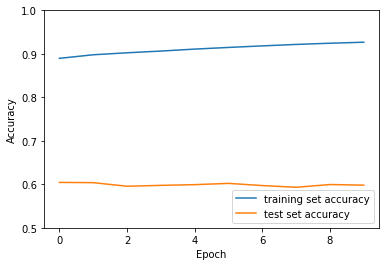

In [106]:
plt.plot(history.history['accuracy'], label='training set accuracy')
plt.plot(history.history['val_accuracy'], label = 'test set accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

## Examining model behaviour

First, let's explore how we can apply the trained model to a specific example in our test data (or training data), to examine what it's done.

We'll use the following code techniques:
* We can apply the trained model to any example using the `.predict()` function
* We can get the nth row from any dataframe using the `.iloc[[n]]` function

In [107]:
#For instance, let's make z the first test example:
z = X_test.iloc[[0]]

#and let's output the prediction for this example:
model.predict(z)

array([[0.0467775]], dtype=float32)

Note that this prediction will be somewhere between 0 and 1. This can be interpreted loosely as confidence: closer to 1 is more confident it is positive sentiment, closer to 0 is more confident it is negative sentiment.

Let's compare this to the actual sentiment of the review, as stored in y_test:

To make sense of this, we probably also want to look at the actual text review, which doesn't live in X_test but does live in the original dataframe we loaded from the CSV file, i.e. `df`. Since our `train_test_split` function has randomised the order of the data before splitting into training and testing sets, we need to get the id (row number) for `df` corresponding to this first test example.

In [112]:
test_ids = list(X_test.index) #gets the original indices in the df dataframe
#test_ids[n] now refers to the id number of the nth test example
originalReview = df.iloc[[test_ids[0]]].reviews
originalReview

0    Unfortunately, the frustration of being Dr. Goldberg's patient is a repeat of the experience I've had with so many other doctors in NYC -- good doctor, terrible staff.  It seems that his staff simply never answers the phone.  It usually takes 2 hours of repeated calling to get an answer.  Who has time for that or wants to deal with it?  I have run into this problem with many other doctors and I just don't get it.  You have office workers, you have patients with medical needs, why isn't anyone answering the phone?  It's incomprehensible and not work the aggravation.  It's with regret that I feel that I have to give Dr. Goldberg 2 stars.
Name: reviews, dtype: object

Try this with a few more examples and see what you find. If you're comfortable with python, can you think of a way to identify misclassified test examples and just print out those? Or, even better, find test examples that are confidently classified correctly, or test examples that are "confidently" misclassified, and examine those?

In [116]:
z = X_test.iloc[[4]]
model.predict(z)
#y_test[4]


array([[0.9988098]], dtype=float32)

In [118]:
test_ids = list(X_test.index) #gets the original indices in the df dataframe
#test_ids[n] now refers to the id number of the nth test example
originalReview = df.iloc[[test_ids[4]]].reviews
originalReview

4    All the food is great here. But the best thing they have is their wings. Their wings are simply fantastic!!  The \"Wet Cajun\" are by the best & most popular.  I also like the seasoned salt wings.  Wing Night is Monday & Wednesday night, $0.75 whole wings!\n\nThe dining area is nice. Very family friendly! The bar is very nice is well.  This place is truly a Yinzer's dream!!  \"Pittsburgh Dad\" would love this place n'at!!
Name: reviews, dtype: object

For more fun, how about testing this classifier on our own new, fake "reviews"? Here's code to create an example of your own and apply the classifier to it. We'll have to first convert a string of text to a vector of word counts and put it in a dataframe, so here's a function for that:

In [119]:
# Turns a text string into a dataframe example (***Note you'll need to change this from 'review' for your own dataset)
def createExample(myText):

    newExample = np.array([[myText]])
    tdf = pd.DataFrame(newExample, columns=["review"])
    matrix = vectorizer.transform(tdf['review'])
    newDf = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names_out())
    return newDf 

In [124]:
#Here's a text about amazing food
myText = "This restaurant only serves yummy yummy delicious amazing beautiful meals"
t = createExample(myText) #When we print the dataframe, you see zombies' word count is 3:
t

,00,10,100,11,12,15,20,24,25,30,...,write,wrong,yeah,year,years,yelp,yes,young,yum,yummy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [125]:
#apply the model to classify your new text:
model.predict(t)

array([[0.9833625]], dtype=float32)

Now try writing some "great" and "terrible" reviews and see what happens to the classification outputs:

In [126]:
model.predict(createExample("This restaurant is the worst it's terrible horrible"))

array([[0.0126042]], dtype=float32)

## Explore on your own

Change the code above to explore:
* Does changing the number of neurons in the hidden layer change the results? What happens to accuracy when you use 1 neuron? 100 neurons? 
* Try editing the neural network so that you have 2 hidden layers of 10 neurons each. What happens to accuracy? 

Investigating the model
* Can you examine the model's performance on the test data to discover anything about what mistakes this model makes? Or anything about what types of reviews are easy to classify accurately?
* Can you come up with your own, new examples of positive or negative reviews that illustrate the mistakes the model makes?